# Extra Figure

This notebook is used to generate some extra figures which are included not in the paper but only the online documentation

In [1]:
from funcs import get_parc_sizes
from plot_funcs import (get_results, plot_avg_ranks, get_ranks_sizes, get_across_ranks,
                        get_rank_model_order, mean_rank, get_intra_pipeline_df,
                        get_results_df, plot_raw_scores, add_extra_ticks)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/home/sage/anaconda3/envs/bpt/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
# Load results
results = get_results('../exp/results')
parc_sizes = get_parc_sizes(everything=True)

static = {'random': True, 'base': True, 'fs': True, 'ico': True}

Found: 87390 Incomplete: 0


## Figure 2 w/ variable avg summary

In [3]:
def plot_figure2_base(rank_type, inset=True):

    # Main figure + subplot
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    if inset:
        axins = inset_axes(ax, width="45%", height="40%", borderpad=6, loc=7)
    
    # Plot each
    plot_avg_ranks(results, log=False, ax=ax, rank_type=rank_type, **static)
    if inset:
        plot_avg_ranks(results, log=True, ax=axins, sm=.5, rank_type=rank_type, **static)

        # inset labels
        axins.set_xlabel('')
        axins.set_ylabel('')
        axins.set_title('Log10 - Log10')
        axins.get_legend().remove()

    # Get reference for adding r2 ticks
    ref = get_ranks_sizes(results, log=False, by_group=False,
                          add_raw=True, rank_type=rank_type, **static)
    
    # Add title
    ax.set_title('Performance - Size Scaling', fontsize=20)
    
    # Return ref and ax
    return ax, ref

### Median

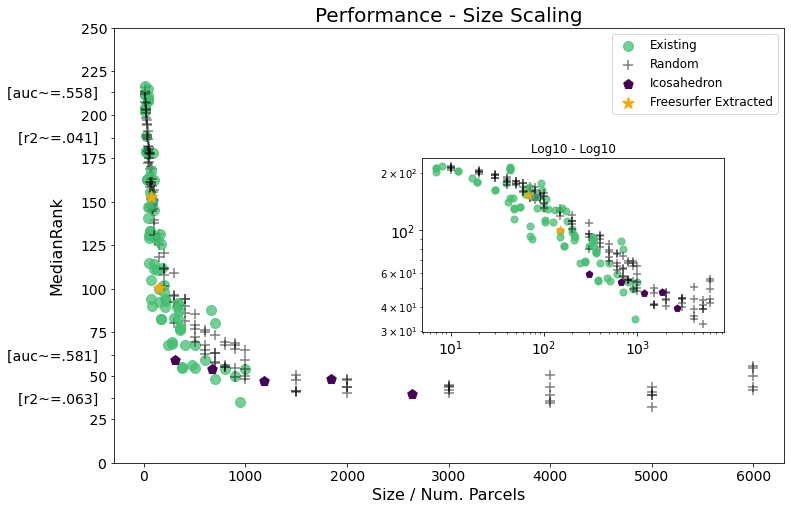

In [4]:
# Plot
ax, ref = plot_figure2_base(rank_type='Median_Rank')

# Add Extra ticks
add_extra_ticks(ax, ref, roc_extra_ticks=[213, 62],
                r2_extra_ticks=[187, 37])

plt.savefig('Figures/Figure2_median.png', dpi=500, bbox_inches='tight')

### Max and Min

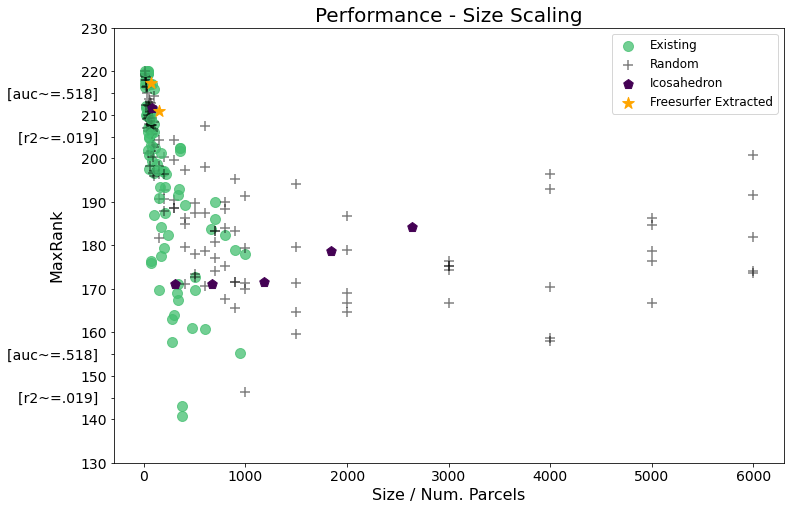

In [5]:
# Plot
ax, ref = plot_figure2_base(rank_type='Max_Rank', inset=False)

# Add Extra ticks
add_extra_ticks(ax, ref,
                roc_extra_ticks=[215, 155],
                r2_extra_ticks=[205, 145])

plt.savefig('Figures/Figure2_max.png', dpi=500, bbox_inches='tight')

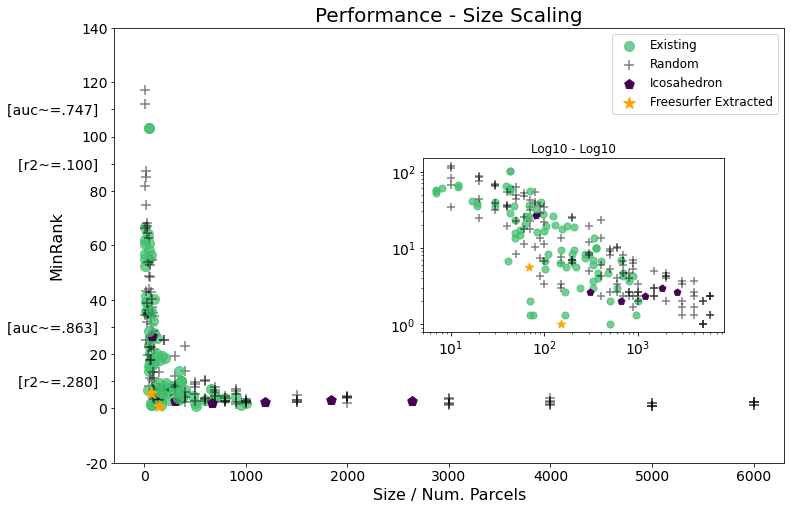

In [9]:
# Plot
ax, ref = plot_figure2_base(rank_type='Min_Rank', inset=True)

# Add Extra ticks
add_extra_ticks(ax, ref,
                roc_extra_ticks=[110, 30],
                r2_extra_ticks=[90, 10])

plt.savefig('Figures/Figure2_min.png', dpi=500, bbox_inches='tight')

In [7]:
stop

NameError: name 'stop' is not defined

In [ ]:
# Make a combined df with both intra and inter
intra_pipe_df = get_intra_pipeline_df(results, log=True,
                                      threshold=False,
                                      stacked=True, voted=True)
inter_pipe_df = get_across_ranks(results, log=True,
                                 stacked=True, voted=True)

intra_pipe_df['Comparison Type'] = 'Intra-Pipeline'
inter_pipe_df['Comparison Type'] = 'Inter-Pipeline'

combined_df = pd.concat([intra_pipe_df, inter_pipe_df])
combined_df = combined_df.rename(columns={'Mean_Rank': 'Mean Rank',
                                          'Model': 'Pipeline', 'Size': 'Num. Parcels'})
combined_df = combined_df.replace({'lgbm': 'LGBM', 'elastic': 'Elastic-Net',
                                   'svm':'SVM', 'all': 'All'})


g = sns.lmplot(y='Mean Rank', x='Num. Parcels',
               data=combined_df, hue='Pipeline',
               row='Comparison Type', facet_kws=dict(sharey=False),
               aspect=1.5, legend=False)

g.set(xlim=(2.4, 3.95))

sns.set_context("paper", rc={"axes.fontsize":16})  

g.axes[0][0].set_title('Intra-Pipeline Ensemble Comparison', fontsize=18)
g.axes[1][0].set_title('Inter-Pipeline Ensemble Comparison', fontsize=18)

# Set axis attributes / sizes
g.axes[1][0].set_xlabel('Num. Parcels (log10)', fontsize=14)

for i in [0, 1]:
    g.axes[i][0].set_ylabel('Mean Rank (log10)', fontsize=14)
    g.axes[i][0].xaxis.set_tick_params(labelsize=12)
    g.axes[i][0].yaxis.set_tick_params(labelsize=12)

plt.legend(fontsize=12)

plt.savefig('Figures/interpipeline_ensemble_comparison.png', dpi=300, bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

plot_avg_ranks(results, model='average', ax=axes[0][0], log=True, stacked=True, voted=True)
handles, labels = axes[0][0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))

plot_avg_ranks(results, model='elastic',  ax=axes[0][1], log=True, stacked=True, voted=True)

plot_avg_ranks(results, model='svm', ax=axes[1][0], log=True, stacked=True, voted=True)
                                                    
plot_avg_ranks(results, model='lgbm', ax=axes[1][1], log=True, stacked=True, voted=True)

for i in range(2):
    for j in range(2):
        axes[i][j].set_ylabel('')
        axes[i][j].set_xlabel('')
        axes[i][j].set_ylim(9, 300)
        axes[i][j].get_legend().remove()
        

axes[1][1].legend(by_label.values(), by_label.keys(),
                  bbox_to_anchor=(.132, 1.225), edgecolor='black',
                  framealpha=None)

axes[0][1].set_xticks([])
axes[0][1].set_yticks([])
axes[1][1].set_yticks([])
axes[0][0].set_xticks([])

plt.savefig('Figures/Ensemble-Intra-Model-Comparison.png', dpi=300)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

plot_avg_ranks(results, model='average', ax=axes[0][0], log=True, **static)
handles, labels = axes[0][0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))

plot_avg_ranks(results, model='elastic',  ax=axes[0][1], log=True, **static)

plot_avg_ranks(results, model='svm', ax=axes[1][0], log=True, **static)
                                                    
plot_avg_ranks(results, model='lgbm', ax=axes[1][1], log=True, **static)

for i in range(2):
    for j in range(2):
        axes[i][j].set_ylabel('')
        axes[i][j].set_xlabel('')
        axes[i][j].set_ylim(9, 300)
        axes[i][j].get_legend().remove()
        

axes[1][1].legend(by_label.values(), by_label.keys(),
                  bbox_to_anchor=(.132, 1.225), edgecolor='black',
                  framealpha=None)

axes[0][1].set_xticks([])
axes[0][1].set_yticks([])
axes[1][1].set_yticks([])
axes[0][0].set_xticks([])

plt.savefig('Figures/Intra-Model-Comparison.png', dpi=300)

In [ ]:
plot_avg_ranks(results, across=True, log=True, **static)
plt.savefig('Figures/Inter-Model-Comparison-Log.png', dpi=300)

In [ ]:
plot_avg_ranks(results, across=True, log=False, **static)
plt.xticks([100, 200, 300])
plt.savefig('Figures/Inter-Model-Comparison.png', dpi=300)

In [ ]:
plot_avg_ranks(results, across=True, log=True, **static)
plt.savefig('Figures/Inter-Model-Comparison-Log.png', dpi=300)

In [ ]:
plot_avg_ranks(results, model='average', stacked=True,
               voted=True, sep_dif_sizes=True, log=True)